# Quantlib - Tutorial

In [350]:
from src import quantlib as ql
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [351]:
import pandas as pd
import matplotlib.pyplot as plt

## Financial prices time series 

---

In [43]:
# Example tickers and dates
tickers   = ["MSFT","AAPL","AMZN","GOOG","KO","GE","IBM"]
startdate = "2011-12-31" 
enddate   = "2022-12-31" 

Get "Adj Close" prices from **yahoo finance**

In [44]:
assets = ql.getassets(tickers, startdate=startdate, enddate=enddate, datatype="Adj Close")
assets

,AAPL,AMZN,GE,GOOG,IBM,KO,MSFT
Date,,,,,,,
2012-01-03,12.500195,8.951500,86.152100,16.573130,117.096085,24.712475,21.413063
2012-01-04,12.567371,8.875500,87.090576,16.644611,116.618347,24.557446,21.916994
2012-01-05,12.706890,8.880500,87.043633,16.413727,116.065254,24.441172,22.140970
2012-01-06,12.839727,9.130500,87.512871,16.189817,114.732765,24.286150,22.484915
2012-01-09,12.819362,8.928000,88.498268,15.503389,114.135635,24.286150,22.188965
...,...,...,...,...,...,...,...
2022-12-23,131.658981,85.250000,63.789425,89.809998,139.931198,63.334194,238.133545
2022-12-27,129.831772,83.040001,64.608337,87.930000,140.691849,63.721226,236.367981
2022-12-28,125.847855,81.820000,63.929810,86.459999,138.320984,63.086098,233.944031


## Returns 

---

### Percentage returns

In [45]:
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)
rets

,AAPL,AMZN,GE,GOOG,IBM,KO,MSFT
Date,,,,,,,
2012-01-04,0.005374,-0.008490,0.010893,0.004313,-0.004080,-0.006273,0.023534
2012-01-05,0.011102,0.000563,-0.000539,-0.013871,-0.004743,-0.004735,0.010219
2012-01-06,0.010454,0.028152,0.005391,-0.013642,-0.011481,-0.006343,0.015534
2012-01-09,-0.001586,-0.022178,0.011260,-0.042399,-0.005205,0.000000,-0.013162
2012-01-10,0.003580,0.004368,-0.007423,0.001092,-0.001541,0.005948,0.003605
...,...,...,...,...,...,...,...
2022-12-23,-0.002798,0.017425,0.000245,0.017562,0.005466,0.007578,0.002267
2022-12-27,-0.013878,-0.025924,0.012838,-0.020933,0.005436,0.006111,-0.007414
2022-12-28,-0.030685,-0.014692,-0.010502,-0.016718,-0.016851,-0.009967,-0.010255


### Log-returns

In [10]:
lrets = ql.compute_logreturns(assets, mpor=1, ascending=True, dropna=True)
lrets

,AAPL,AMZN,GE,GOOG,IBM,KO,MSFT
Date,,,,,,,
2012-01-04,0.005360,-0.008526,0.010834,0.004304,-0.004088,-0.006293,0.023261
2012-01-05,0.011041,0.000563,-0.000539,-0.013969,-0.004754,-0.004746,0.010167
2012-01-06,0.010400,0.027763,0.005377,-0.013735,-0.011547,-0.006363,0.015415
2012-01-09,-0.001587,-0.022428,0.011197,-0.043324,-0.005218,0.000000,-0.013250
2012-01-10,0.003574,0.004359,-0.007451,0.001092,-0.001544,0.005931,0.003599
...,...,...,...,...,...,...,...
2022-12-23,-0.002802,0.017274,0.000245,0.017409,0.005451,0.007550,0.002265
2022-12-27,-0.013976,-0.026266,0.012756,-0.021155,0.005421,0.006092,-0.007442
2022-12-28,-0.031166,-0.014801,-0.010558,-0.016859,-0.016995,-0.010017,-0.010308


### Single compounding of returns

In [11]:
ql.compound(rets)

AAPL     9.378394
AMZN     8.383902
GE      -0.241466
GOOG     4.353847
IBM      0.188600
KO       1.554410
MSFT    10.171723
dtype: float64

That is, for example, all together the overall returns of AAPL have been about 938%. Or, for GE, it has been about -24%.

This is equivalent to compute the return between the last and the first corresponding price series:

In [12]:
tt = "AAPL"
rr = assets.loc[ assets[tt].index[-1] , tt] / assets.loc[ assets[tt].index[0] , tt] - 1
print(f"{tt} overall compounded return:\t{rr*100:.0f}%")

tt = "GE"
rr = assets.loc[ assets[tt].index[-1] , tt] / assets.loc[ assets[tt].index[0] , tt] - 1
print(f"{tt} overall compounded return:\t{rr*100:.0f}%")

AAPL overall compounded return:	938%
GE overall compounded return:	-24%


### Compounding returns

Cumulative compounding returns. To see what an initial (e.g., investment) price/amount would have resulted in using all available returns history.

In [13]:
# Compute returns leaving the first mpor row of nans
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=False)

ival = 1
ql.compound_returns(rets, start=ival).fillna(ival)

,AAPL,AMZN,GE,GOOG,IBM,KO,MSFT
Date,,,,,,,
2012-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2012-01-04,1.005374,0.991510,1.010893,1.004313,0.995921,0.993727,1.023534
2012-01-05,1.016536,0.992068,1.010348,0.990382,0.991197,0.989022,1.033994
2012-01-06,1.027162,1.019997,1.015795,0.976871,0.979818,0.982748,1.050056
2012-01-09,1.025533,0.997375,1.027233,0.935453,0.974718,0.982748,1.036234
...,...,...,...,...,...,...,...
2022-12-23,10.532557,9.523544,0.740428,5.419013,1.195012,2.562843,11.120946
2022-12-27,10.386382,9.276658,0.749933,5.305576,1.201508,2.578505,11.038494
2022-12-28,10.067674,9.140368,0.742057,5.216878,1.181261,2.552804,10.925294


That is, 1$ invested in AAPL trasnformed into 10.37 after 10 years. 
This is equivalent to the compounded return of about 938% seen previously


### Annualizing returns

Computation of the return-per-year, or **annualized return**.

Let $R$ be the series of, e.g., daily returns. The total length series is $n$.
Also, let $R_{c}$ be the compounded (total) return of the series (see above **.compound_returns**).
Then, the annualized return, $R_{y}$, is calculated as:
$$
R_{y} = (1 + R_{c})^{p/n} - 1,
\quad\text{where}\quad
p =
\begin{cases}
252  	& \text{for daily returns},\\
52   	& \text{for weekly returns},\\
12  	& \text{for monthly returns},\\
\text{and so on}
\end{cases}
$$
The variable $p$ is the **periods-per-year** and denotes the number of **trading** days in a year.

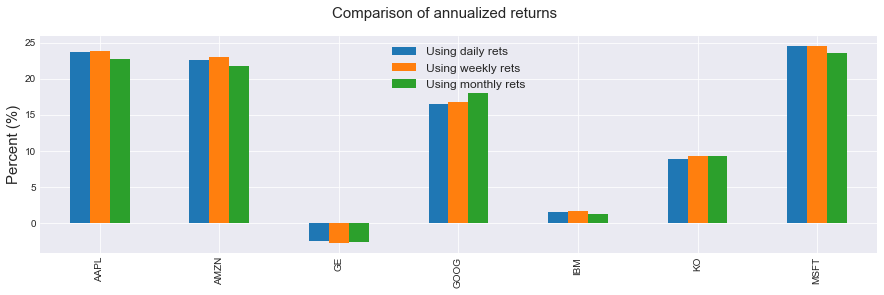

In [14]:
# Using daily prices/returns, 1d
assets = ql.getassets(tickers, startdate=startdate, enddate=enddate, datatype="Adj Close", interval="1d")
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)
drs = ql.annualize_returns(rets, ppy=252)

# Using weekly prices/returns, 5d
assets = ql.getassets(tickers, startdate=startdate, enddate=enddate, datatype="Adj Close", interval="5d")
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)
wrs = ql.annualize_returns(rets, ppy=52)

# using monthly prices/returns, 1mo
assets = ql.getassets(tickers, startdate=startdate, enddate=enddate, datatype="Adj Close", interval="1mo")
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)
mrs = ql.annualize_returns(rets, ppy=12)

# Annualized volatilities
rrs = pd.DataFrame({"Using daily rets"  : drs,
                    "Using weekly rets" : wrs,
                    "Using monthly rets": mrs})

# Plot
fig, ax = plt.subplots(1,1,figsize=(15,4))
(rrs* 100).plot.bar(ax=ax,grid=True)
fig.suptitle("Comparison of annualized returns", fontsize=15)
ax.set_xlabel("",fontsize=18)
ax.set_ylabel("Percent (%)",fontsize=15)
ax.legend(fontsize=12)
plt.show()

## Drawndown

---

In [58]:
assets = ql.getassets(tickers, startdate=startdate, enddate=enddate, datatype="Adj Close", interval="1d")
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)

Computing the absolute (*percent=False*) and relative (*percent=True*) **drawdown** series (*maxd=False*) 

In [20]:
maxd = False
dd = ql.drawdown(assets, rets=False, maxd=maxd, percent=False)  # Absolute drawdowns
dd_p = ql.drawdown(assets, rets=False, maxd=maxd, percent=True) # Relative drawdowns

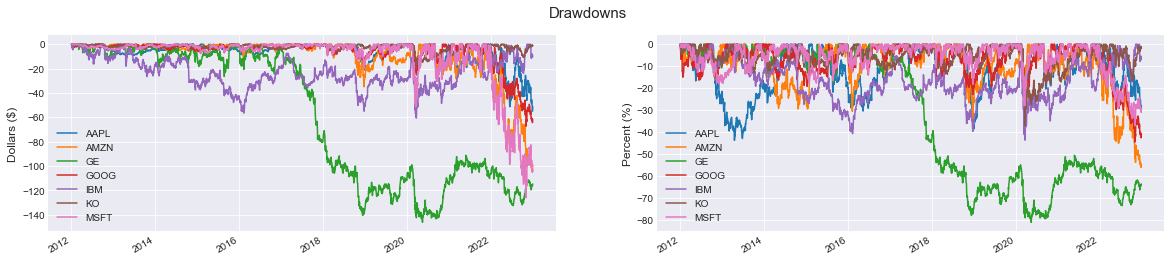

In [22]:
# Plot
fig, ax = plt.subplots(1,2,figsize=(20,4))
ax = ax.flatten()
fig.suptitle("Drawdowns", fontsize=15)

n = 0
dd.plot(ax=ax[n],grid=True)
ax[n].set_xlabel("",fontsize=18)
ax[n].set_ylabel("Dollars ($)",fontsize=12)
ax[n].legend(fontsize=10)

n = 1
(dd_p * 100).plot(ax=ax[n],grid=True)
ax[n].set_xlabel("",fontsize=18)
ax[n].set_ylabel("Percent (%)",fontsize=12)
ax[n].legend(fontsize=10)
plt.show()

Computing the absolute (*percent=False*) and relative (*percent=True*) **maximum drawdowns** (*maxd=True*)

In [26]:
maxd = True
mdd = ql.drawdown(assets, rets=False, maxd=maxd, percent=False)  # Maximum absolute drawdowns
mdd_p = ql.drawdown(assets, rets=False, maxd=maxd, percent=True) # Maximum relative drawdowns

In [27]:
mdd

AAPL    -54.836014
AMZN   -104.750496
GE     -146.171562
GOOG    -67.219002
IBM     -60.552956
KO      -20.094265
MSFT   -125.961411
dtype: float64

In [28]:
mdd_p

AAPL   -0.437972
AMZN   -0.561453
GE     -0.811914
GOOG   -0.446018
IBM    -0.437200
KO     -0.369875
MSFT   -0.371485
dtype: float64

Note that drawdowns can be computed also if the input data are not prices but returns (*rets=True*). In this case *percent* returns are returns by default.

In [29]:
ql.drawdown(rets, rets=True, maxd=True, percent=True) # the same for percent = False

AAPL   -0.437972
AMZN   -0.561453
GE     -0.811914
GOOG   -0.446018
IBM    -0.437200
KO     -0.369875
MSFT   -0.371485
dtype: float64

The opposite of a drawdown is the (not so interesting) **drawup**

In [30]:
maxd = False
du = ql.drawup(assets, maxd=maxd, percent=False)  # Absolute drawup
du_p = ql.drawup(assets, maxd=maxd, percent=True) # Relative drawnup

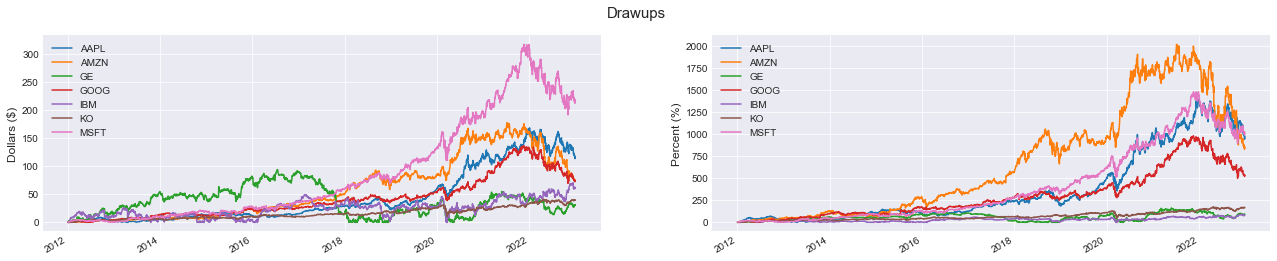

In [31]:
# Plot
fig, ax = plt.subplots(1,2,figsize=(22,4))
ax = ax.flatten()
fig.suptitle("Drawups", fontsize=15)

n = 0
du.plot(ax=ax[n],grid=True)
ax[n].set_xlabel("",fontsize=18)
ax[n].set_ylabel("Dollars ($)",fontsize=12)
ax[n].legend(fontsize=10)

n = 1
(du_p * 100).plot(ax=ax[n],grid=True)
ax[n].set_xlabel("",fontsize=18)
ax[n].set_ylabel("Percent (%)",fontsize=12)
ax[n].legend(fontsize=10)
plt.show()

## Volatility

---

### Classic Volatility

In [19]:
assets = ql.getassets(tickers, startdate=startdate, enddate=enddate, datatype="Adj Close", interval="1d")
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)

In [21]:
# Volatility over the entire period
rets.std()

AAPL    0.018335
AMZN    0.020491
GE      0.020440
GOOG    0.016851
IBM     0.014436
KO      0.011169
MSFT    0.016714
dtype: float64

### Semi-Volatility

Computation of the semi-volatility, i.e., the volatility of negative returns

In [25]:
# (Negative) Semi-Volatility 
ql.semistd(rets, negative=True)

AAPL    0.013329
AMZN    0.014430
GE      0.014990
GOOG    0.012151
IBM     0.011583
KO      0.008977
MSFT    0.012224
dtype: float64

If *negative=False* is passed, then it computes the semi-volatility of positive returns

### Annualizing the volatility

Similarly to the annualized returns, the annualized volatility can be computed too (required if one need to 
compare volatilities of different stocks obtained from different types of returns).

The annualized volatility, $\sigma_y$, is a function of the square root of the time interval used to compute returns:
$$
\sigma_{y} = \sigma_p\sqrt{p},
\quad\text{where}\quad
p =
\begin{cases}
252  	& \text{for daily returns},\\
52   	& \text{for weekly returns},\\
12  	& \text{for monthly returns},\\
\text{and so on}
\end{cases}
$$
Note that this annualization is *justifie* only if the returns used to compute the volatility are log-returns. 
This is because it is typically assumed that stock prices are log-normally distributed, which, in turns, implies that log-returns are normally distributed with mean $(\mu-\sigma^2/2)dt$ and variance $\sigma^2 dt$. Hence, the volatility is given by and one can approximate the volatility for larger period of time by $\sigma\sqrt{dt}$.

In [ ]:
# Using daily prices/returns, 1d
assets = ql.getassets(tickers, startdate=startdate, enddate=enddate, datatype="Adj Close", interval="1d")
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)
dvol = ql.annualize_std(rets, ppy=252)

# Using weekly prices/returns, 5d
assets = ql.getassets(tickers, startdate=startdate, enddate=enddate, datatype="Adj Close", interval="5d")
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)
wvol = ql.annualize_std(rets, ppy=52)

# using monthly prices/returns, 1mo
assets = ql.getassets(tickers, startdate=startdate, enddate=enddate, datatype="Adj Close", interval="1mo")
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)
mvol = ql.annualize_std(rets, ppy=12)

# Annualized volatilities
vols = pd.DataFrame({"Using daily rets"  : dvol,
                     "Using weekly rets" : wvol,
                     "Using monthly rets": mvol})

# Plot
fig, ax = plt.subplots(1,1,figsize=(20,4))
(vols* 100).plot.bar(ax=ax,grid=True)
fig.suptitle("Comparison of annualized volatilities", fontsize=14)
ax.set_xlabel("",fontsize=16)
ax.set_ylabel("Percent (%)",fontsize=14)
ax.legend(fontsize=12)
plt.show()

### EWMA Volatility

TODO

## Distributions

---

### Normal distributions

#### Simple PDF and CDF evaluation at a given input point

In [46]:
x   = 0
mu  = 0
std = 1

In [47]:
# PDF evaluation
ql.dist_normal(x, mu=mu, std=std, cum=False)

0.3989422804014327

In [48]:
# CDF evaluation
ql.dist_normal(x, mu=mu, std=std,cum=True)

0.5

#### Generation of the normal PDF and CDF

In [49]:
# Generation
npdf = ql.gen_pdf_normal(mu=mu, std=std, dx=0.01)
ncdf = ql.gen_cdf_normal(mu=mu, std=std, dx=0.01)

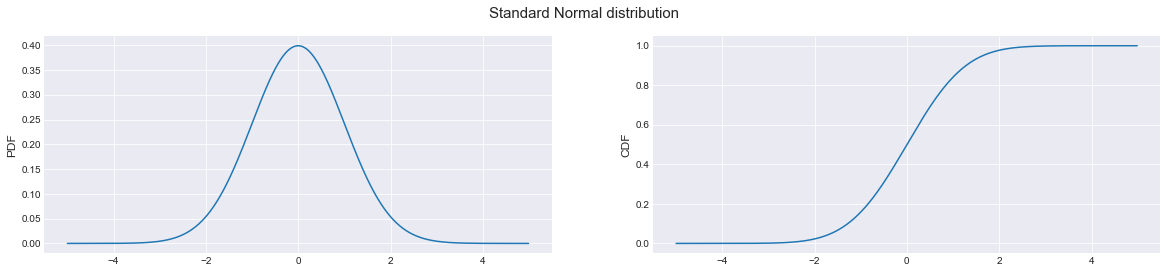

In [50]:
# Plot
fig, ax = plt.subplots(1,2,figsize=(20,4))
ax = ax.flatten()
fig.suptitle("Standard Normal distribution", fontsize=15)

n = 0
npdf.plot(ax=ax[n],grid=True)
ax[n].set_xlabel("",fontsize=14)
ax[n].set_ylabel("PDF",fontsize=12)
#ax[n].legend(fontsize=12)

n = 1
ncdf.plot(ax=ax[n],grid=True)
ax[n].set_xlabel("",fontsize=14)
ax[n].set_ylabel("CDF",fontsize=12)
plt.show()

#### Test for normality

Computes the **Jarque-Bera** test for normality for a given input significance level

In [51]:
ql.is_normal(rets, siglev=0.05)

AAPL    False
AMZN    False
GE      False
GOOG    False
IBM     False
KO      False
MSFT    False
dtype: bool

#### Generation of normally distributed RVs

In [52]:
nnc = ql.gen_rvs_normal(mu=mu, std=std, size=10000)

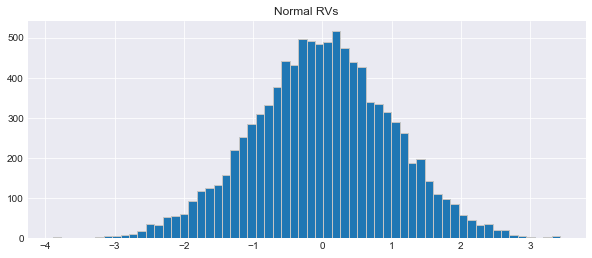

In [53]:
fig = plt.figure(figsize=(10,4))
plt.title("Normal RVs")
nnc.hist(grid=True, bins=60, density=False, edgecolor=(0.77,0.77,0.77))
plt.show()

Evidently, the normality test is passed here

In [54]:
ql.is_normal(nnc, siglev=0.05)

True

### t-Student distribution

Compute the Standardized and the Non-Standardized t-Student distibutions with $\nu$ degrees of freedom where:
  * the **Standardized** t-Student has mean zero and unit variance
  * the **Non-Standardized** t-Student has mean equal to $\mu$ and variance equal to $\nu/(\nu - 2)$, for $\nu>2$.

#### Simple PDF and CDF evaluation at given input point

In [57]:
x     = 0
df    = 6  # t-Student degrees of freedom
mu    = 0
scale = 1

In [58]:
# "Non-Standardized" t-Student 
pdf = ql.dist_tstudent(x, df=df, mu=mu, scale=scale, stdz=False, cum=False)
cdf = ql.dist_tstudent(x, df=df, mu=mu, scale=scale, stdz=False, cum=True)
pdf, cdf

(0.3827327723098717, 0.5)

In [59]:
# "Standardized" t-Student 
pdf = ql.dist_tstudent(x, df=df, mu=mu, scale=scale, stdz=True, cum=False)
cdf = ql.dist_tstudent(x, df=df, mu=mu, scale=scale, stdz=True, cum=True)
pdf, cdf

(0.4687500000000001, 0.5)

#### Generation of the t-Student PDF and CDF

In [60]:
# Generation of "Non-Standardized" t-Student, with (true) variance equal to (scale**2)*df/(df-2)
tpdf = ql.gen_pdf_tstudent(df=df, mu=mu, scale=scale, stdz=False, dx=0.01)
tcdf = ql.gen_cdf_tstudent(df=df, mu=mu, scale=scale, stdz=False, dx=0.01)
t_var = scale**2*df/(df-2)
tpdf.name = tpdf.name + f" (Var: {t_var:.2f})"

# Generation of "Standardized" t-Student, with (true) unit variance
tpdf_stdz = ql.gen_pdf_tstudent(df=df, mu=mu, scale=scale, stdz=True, dx=0.01)
tcdf_stdz = ql.gen_cdf_tstudent(df=df, mu=mu, scale=scale, stdz=True, dx=0.01)
t_stdz_var = 1
tpdf_stdz.name = tpdf_stdz.name + f" (Var: 1)"

# Normal distribution (for comparison), with variance equal to scale**2
npdf = ql.gen_pdf_normal(mu=mu, std=scale, dx=0.01)
ncdf = ql.gen_cdf_normal(mu=mu, std=scale, dx=0.01)
n_var = scale**2
npdf.name = npdf.name + f" (Var: {n_var:.2f})"

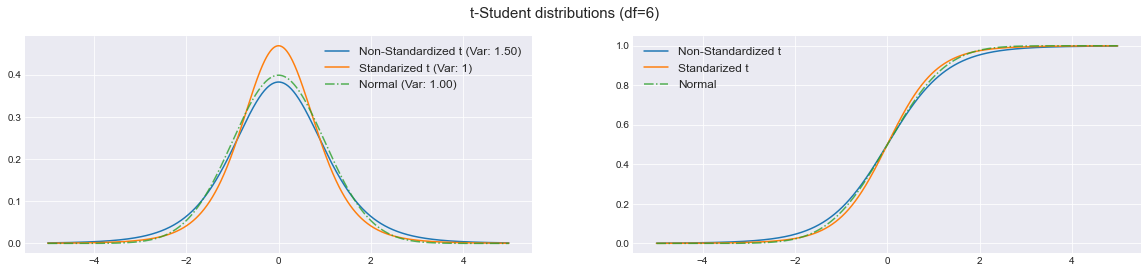

In [61]:
# Plot
fig, ax = plt.subplots(1,2,figsize=(20,4))
ax = ax.flatten()
fig.suptitle(f"t-Student distributions (df={df:.0f})", fontsize=15)

n = 0
tpdf.plot(ax=ax[n],grid=True)
tpdf_stdz.plot(ax=ax[n],grid=True)
npdf.plot(ax=ax[n], grid=True, alpha=0.8, style="-.")
ax[n].set_xlabel("",fontsize=18)
ax[n].legend(fontsize=12)

n = 1
tcdf.plot(ax=ax[n],grid=True)
tcdf_stdz.plot(ax=ax[n],grid=True)
ncdf.plot(ax=ax[n], grid=True, alpha=0.8, style="-.")
ax[n].set_xlabel("",fontsize=18)
ax[n].legend(fontsize=12)
plt.show()

By putting *scale = 1*, observe how the **leptokurtic** character of 
the t-Student distribution appears by comparing, in particular, 
the Standardized t-Student distribution with the normal distribution both having the same (unit) variance. 

#### Generation of t-Student distributed RVs

In [67]:
# "Non-Standardized" t-Student, with (true) variance equal to (scale**2)*df/(df-2)
trvs = ql.gen_rvs_tstudent(df=df, mu=mu, scale=scale, stdz=False, size=10000)
trvs.name = "Non-Standardized"

In [68]:
# "Standardized" t-Student, with (true) unit variance
trvs_std = ql.gen_rvs_tstudent(df=df, mu=mu, scale=scale, stdz=True, size=10000)
trvs_std.name = "Standardized"

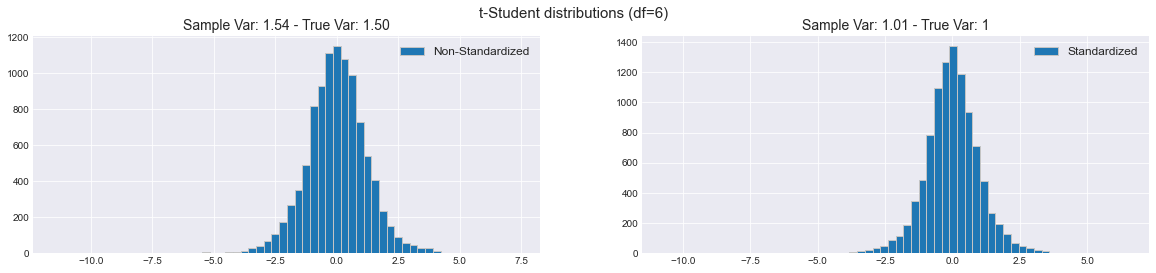

In [69]:
# Plot
fig, ax = plt.subplots(1,2,figsize=(20,4))
ax = ax.flatten()
fig.suptitle(f"t-Student distributions (df={df:.0f})", fontsize=15)

# Non-Standardized
n = 0
trvs.hist(ax=ax[n], grid=True, bins=60, density=False, edgecolor=(0.77,0.77,0.77), legend=True)
ax[n].set_title(f"Sample Var: {trvs.std()**2:.2f} - True Var: {scale**2*df/(df-2):.2f}", fontsize=14)
ax[n].legend(fontsize=12)

# Standardized
n = 1
trvs_std.hist(ax=ax[n], grid=True, bins=60, density=False, edgecolor=(0.77,0.77,0.77), legend=True)
ax[n].set_title(f"Sample Var: {trvs_std.std()**2:.2f} - True Var: 1", fontsize=14)
ax[n].legend(fontsize=12)

plt.show()

In [70]:
# Note that the normality test is not passed here
ql.is_normal(trvs_std, siglev=0.05), ql.is_normal(trvs, siglev=0.05)

(False, False)

### General distributions

If a generic PDF is defined by the user, then random variables can be generated. 

For example, suppose that the following method, *some_pdf*, returns the normal distribution with mean $\mu$ and standard deviation $\sigma$ (evaluated at zero):

In [84]:
ql.some_pdf(0, mu=0, std=1)

0.3989422804014327

Then, random variables with this distribution can be obtained by:

In [85]:
nnrv = ql.gen_rvs_from_pdf(ql.some_pdf, size=1000, mu=0, std=1)
nnrv

0      0.063703
1     -0.566772
2     -1.016666
3      0.424346
4      1.465896
         ...   
995    1.181810
996    1.245621
997    0.871018
998    2.855671
999    1.028223
Length: 1000, dtype: float64

In [86]:
# Double check of the normality
ql.is_normal(nnrv, siglev=0.05)

True

### Distributions fit

Computation of the distribution that best fit a certain input sample distribution data via **Maximum-Likelihood-Estimation** (MLE) 

In [87]:
stock = "GE"
rr = rets[stock]

Computation of the **Normal** and **t-Student** distribution that best fit the given returns data

In [88]:
ndist = ql.dist_fit(rr, dtype="n", pdf=True, dx=0.002)
tdist = ql.dist_fit(rr, dtype="t", pdf=True, dx=0.002)

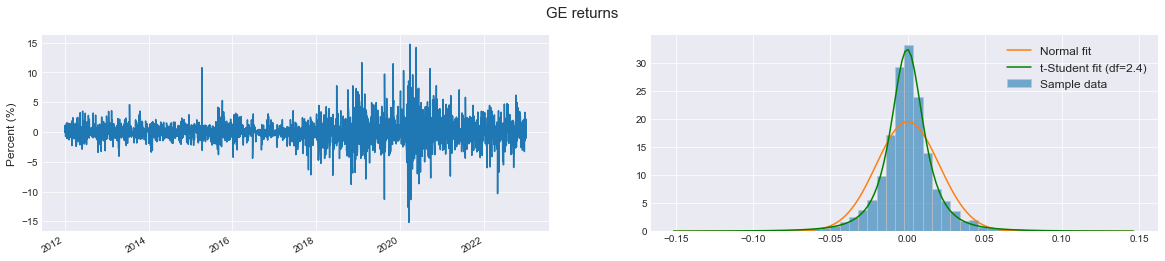

In [89]:
# Plot
fig, ax = plt.subplots(1,2,figsize=(20,4))
ax = ax.flatten()
fig.suptitle(f"{stock} returns", fontsize=15)

n = 0
(rr*100).plot(ax=ax[n], grid=True, label="")
ax[n].set_xlabel("",fontsize=18)
ax[n].set_ylabel("Percent (%)",fontsize=12)
#ax[n].legend(fontsize=10)

n = 1
rr.hist(ax=ax[n], grid=True, density=True, bins=50, edgecolor=(0.77,0.77,0.77), alpha=0.6, label="Sample data")
ax[n].plot(ndist["x"], ndist["pdf"], label="Normal fit", color="tab:orange")
ax[n].plot(tdist["x"], tdist["pdf"], label=f"t-Student fit (df={tdist['df']:.1f})", color="green")
ax[n].set_xlabel("",fontsize=18)
ax[n].legend(fontsize=12)
plt.show()

It can be observed that stock returns are likely to be t-Student distributed as the t-Student distribution computed via the MLE provide a better fit of the sample data. 

Computation of the **Empirical CDF** (ECDF) (i.e., the CDF of the sample data) and of the Normal and t-Student data:

In [90]:
# Empirical CDF (CDF) of the sample data
fe  = ql.empirical_cdf(rr)
# Normal CDF of the data (via MLE)
nfh = ql.hypothetical_cdf(rr, dtype="n")
# t-Student CDF of the data (via MLE)
tfh = ql.hypothetical_cdf(rr, dtype="t")

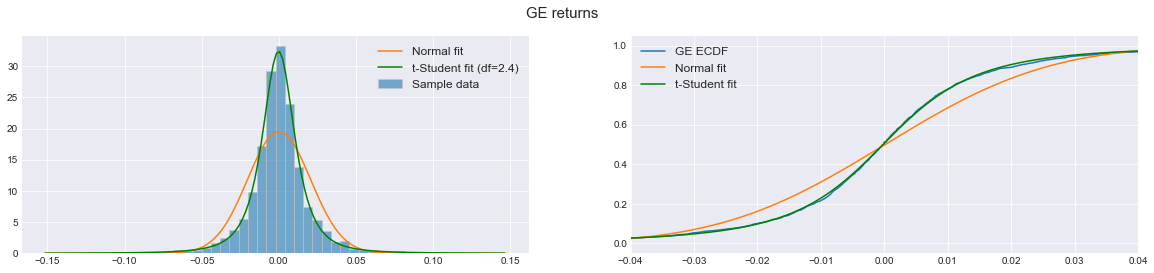

In [91]:
# Plot
fig, ax = plt.subplots(1,2,figsize=(20,4))
ax = ax.flatten()
fig.suptitle(f"{stock} returns", fontsize=15)

n = 0
rr.hist(ax=ax[n], grid=True, density=True, bins=50, edgecolor=(0.77,0.77,0.77), alpha=0.6, label="Sample data", color="tab:blue")
ax[n].plot(ndist["x"], ndist["pdf"], label="Normal fit", color="tab:orange")
ax[n].plot(tdist["x"], tdist["pdf"], label=f"t-Student fit (df={tdist['df']:.1f})", color="green")
ax[n].set_xlabel("",fontsize=18)
ax[n].legend(fontsize=12)

n = 1
fe.plot(ax=ax[n], grid=True, label=f"{stock} ECDF", color="tab:blue")
nfh.plot(ax=ax[n], grid=True, label=f"Normal fit", color="tab:orange")
tfh.plot(ax=ax[n], grid=True, label=f"t-Student fit", color="green")
ax[n].set_xlabel("",fontsize=18)
ax[n].legend(fontsize=12)
ax[n].set_xlim([-0.04,0.04])

plt.show()

Observe how from the plot of the CDF it can be seen that the t-Student distribution matches much better the ECDF.

The **Generalized Pareto** distribution can be also fit. This is used to fit *excesses over a certain griven threshold* (i.e., it is used to fit the distribution tails).

In [92]:
# Define a threshold defining the tails
threshold = 95

In [93]:
# Find the corresponding quantile that define the tails

ll = -rr # Get the symmetric series so that the left tails would be on the right
qu_l = ll.quantile(q = threshold/100)
excess_l = ll[ll >= qu_l] - qu_l

qu_r = rr.quantile(q = threshold/100)
excess_r = rr[rr >= qu_r] - qu_r

In [94]:
# GDP fit
gdpdist = ql.dist_fit(excess_l, dtype="gdp", pdf=True, dx=0.001)
gdpdist = ql.dist_fit(excess_r, dtype="gdp", pdf=True, dx=0.001)

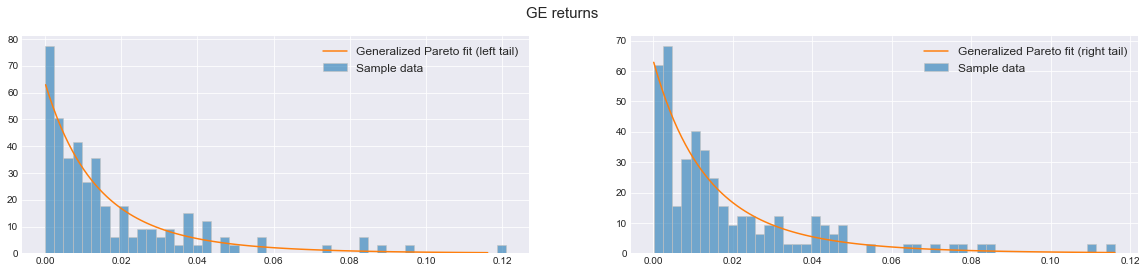

In [95]:
# Plot
fig, ax = plt.subplots(1,2,figsize=(20,4))
ax = ax.flatten()
fig.suptitle(f"{stock} returns", fontsize=15)

n = 0
excess_l.hist(ax=ax[n], grid=True, density=True, bins=50, edgecolor=(0.77,0.77,0.77), alpha=0.6, label="Sample data", color="tab:blue")
ax[n].plot(gdpdist["x"], gdpdist["pdf"], label="Generalized Pareto fit (left tail)", color="tab:orange")
ax[n].set_xlabel("",fontsize=18)
ax[n].legend(fontsize=12)

n = 1
excess_r.hist(ax=ax[n], grid=True, density=True, bins=50, edgecolor=(0.77,0.77,0.77), alpha=0.6, label="Sample data", color="tab:blue")
ax[n].plot(gdpdist["x"], gdpdist["pdf"], label="Generalized Pareto fit (right tail)", color="tab:orange")
ax[n].set_xlabel("",fontsize=18)
ax[n].legend(fontsize=12)

plt.show()

### Hypothesis Testing

Suppose our guess is that a given input series of returns is **t-Student** distributed. 
Once the fit is doen (e.g., via MLE) the **hypothesis testin** checks if the 
the continuous **hypothesized** t-Student distribution, $F_H$ 
and the **empirical** distribution (ECDF) of the sample, $F_E$
are significantly different from each other.

In [96]:
stock = "AAPL"
rr = rets[stock]

In [97]:
# Hypothesized distribution FH
FH = ql.dist_fit(rr, dtype="t", pdf=False)
FH

{'df': 3.382455901361647,
 'mu': 0.0011371125808884515,
 'scale': 0.01227038541839803}

In [98]:
# Empirical CDF 
FE = ql.empirical_cdf(rr, index=False)
FE

0       0.000361
1       0.000723
2       0.001084
3       0.001446
4       0.001807
          ...   
2762    0.998554
2763    0.998916
2764    0.999277
2765    0.999639
2766    1.000000
Name: ECDF, Length: 2767, dtype: float64

#### Null and Alternative hypotheses

There are two hypotheses:

 * **Null** Hypothesis $H_0 = $ the return series <b>is</b> t-Student distributed.		
 * **Alternative** Hypotheses $H_1 = $ the return series <b>is not</b> t-Student distributed.

A statistical test is then used to test the **goodness of fit** 
Once computed, one computes a <b>p-value</b>, 
which is used to make a decision about the hypothesis, which we can either reject or not.

#### Critical Regions

A previous step is knowing the test stastic distribution in order to known 
the correspondig **critical region**. This is calculated using a Monte Carlo simulation.

Let $n$ being the size of the sample return series. Then:
 1. Simulate a random number $u$ between 0 and 1.
 2. Apply the inverse hypothesized CDF to $u$ and set $x := F^{-1}_H(u)$.
 3. Do $n$ repetitions of Steps 1 and 2 (i.e., simulate a new sample return series of size $n$).
 4. Via the MLE, obtain a new hypothesized CDF, $\widehat{F}_H(x)$, for the new sample.
 5. Also, compute the ECDF, $\widehat{F}_E(x)$, of the new simulated sample return series.
 6. Compute the chosen test statistic. 
 7. Repeat Steps 1-6 for a large number of times, thus obtaining a distribution 
    of the test statistic **under the Null Hypothesis**.

Given the distribution of test statistic, one defines the **Critical Region** for a two-side test:
$$
CR_\alpha := (-\infty, q_{\alpha/2}] \cup [q_{1-\alpha/2}, \infty),
$$
where $q_\alpha/2$ and $q_{1-\alpha/2}$ are the $\alpha/2$ (left tail) and $1-\alpha/2$ (right tail) quantiles of the test 
statistic distribution. 

To make a decision about the hypothesis, one computes the test stastic using our data.
That is, we compute both $F_E$ and $F_H$, the test statistic, 
and see is the test falls in or outside the Critical Region 
(or if the corresponding **p-value** is above or below the $\alpha$-significance level).

If the test does not fall into $CR_\alpha$, then the Null Hypothesis is accepted.
Otherwise, it is rejected in favour of the Alternative Hypothesis.

#### Test Statistics

<b>Kolmogorov-Smirnoff</b> (KS) test statistic: 
$$
KS := \max_x |F_E(x) - F_H(x)|,
$$
That is, the KS is the maximum of the vertical distances between the 
two cumulative density functions (more sensitive to the fit around the mean) 

<b>Anderson-Darling</b> (AD) test statistic: 
$$
AD := \max_x \frac{|F_E(x) - F_H(x)|}{\sqrt{F_H(x) (1 - F_H(x))}}.
$$
More accurate in the tails of the distributions. 
It is likely to be the test statistic to trust the most in case 
of assessing the fit using **leptokurtic** distributions.

The following, is a naive implementation of the Critical Region via **for** loops which is pretty slow.

In [100]:
import time

In [205]:
# Calculating the KS test
tic = time.time()
KS_dist = ql.dist_test_stats_naive(FH, dtype="t", size=1000, mcs=1000, htest="KS")
print(f"{time.time() - tic:.1f}s")

26.9s


However, the loop can be rewritten in form of pandas dataframes on which **parallel_apply** can be used.
In this way, we can use substitute the classic **apply** function, which would use only one CPU core, with **parallel_apply**, which will use all cores.

In [101]:
# Calculating the KS and the AS test
tic = time.time()
test_stats = ql.dist_test_stats(FH, dtype="t", size=1000, mcs=1000, htest=["KS","AD"], verbose=2)
print(f"{time.time() - tic:.1f}s")

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
8.3s


In [102]:
# Computing the Critical Region at 5% significance level 
slevel = 5

CR_KS = ql.critical_region(test_stats["KS"], htest="KS", slevel=slevel)
CR_AD = ql.critical_region(test_stats["AD"], htest="AD", slevel=slevel)

CR = dict(CR_KS, **CR_AD)

print(f"Critical region KS: (-inf, {CR['KS']['left']:.4f}) and ({CR['KS']['right']:.4f}, +inf)")
print(f"Critical region AD: (-inf, {CR['AD']['left']:.4f}) and ({CR['AD']['right']:.4f}, +inf)")

Critical region KS: (-inf, 0.0110) and (0.0247, +inf)
Critical region AD: (-inf, 0.0387) and (0.1867, +inf)


In [103]:
# ECDF and Hypothesized distribution
FFE = ql.empirical_cdf(rr, index=True)
FFH = ql.hypothetical_cdf(rr, dtype="t")
# Compute the KS and the AD Test statistic
KStest = ql.test_statistics(FFE, FFH, test="KS")
ADtest = ql.test_statistics(FFE, FFH, test="AD")
# Corresponding p-value
KSpv = ql.pvalues(test_stats["KS"], KStest)
ADpv = ql.pvalues(test_stats["AD"], ADtest)

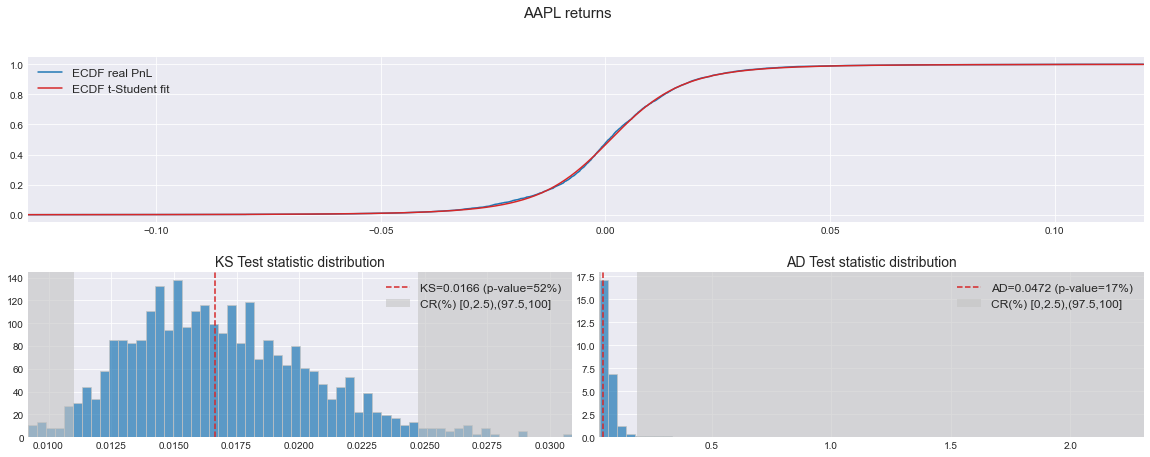

In [104]:
# Plot
fig = plt.figure(figsize=(20, 7))
ax0 = plt.subplot2grid(shape=(2, 2), loc=(0, 0), colspan=2)
ax1 = plt.subplot2grid(shape=(2, 2), loc=(1, 0), colspan=1)
ax2 = plt.subplot2grid(shape=(2, 2), loc=(1, 1), colspan=1)
fig.subplots_adjust(wspace=0.05, hspace=0.3)
fig.suptitle(f"{stock} returns", fontsize=15)

FFE.plot(ax=ax0, grid=True, color="tab:blue", label="ECDF real PnL")
FFH .plot(ax=ax0, grid=True, color="tab:red", label=f"ECDF t-Student fit")
ax0.set_xlim([FFH.index.min(), FFH.index.max()])
ax0.legend(loc="best", fontsize=12)


if KStest > 1e4:
    kslabel = f"KS={KStest:.4} (p-value={(KSpv*100):.0f}%)"
else:
    kslabel = f"KS={KStest:.4f} (p-value={(KSpv*100):.0f}%)"
ax1.axvline(x = KStest if KStest < test_stats["KS"].max() else test_stats["KS"].max(), 
            linestyle = "--", 
            color = "tab:red", 
            label = kslabel)

if ADtest > 1e4:
    adlabel = f"AD={ADtest:.4} (p-value={(ADpv*100):.0f}%)"
else:
    adlabel = f"AD={ADtest:.4f} (p-value={(ADpv*100):.0f}%)"
ax2.axvline(x = ADtest if ADtest < test_stats["AD"].max() else test_stats["AD"].max(), 
            linestyle = "--", 
            color = "tab:red", 
            label = adlabel)

crlabel = "CR(%) [0,{:.1f}),({:.1f},100]".format(0.5*slevel, 100 - 0.5*slevel)

test_stats["KS"].hist(ax=ax1, grid=True, density=True, bins=60, edgecolor=(0.77,0.77,0.77), alpha=0.7, label="", color="tab:blue")
ax1.axvspan(xmin = 0, xmax = CR['KS']['left'], facecolor = (0.77,0.77,0.77), alpha = 0.6, label = "")
ax1.axvspan(xmin = CR['KS']['right'], xmax = test_stats["KS"].max(), facecolor = (0.77,0.77,0.77), alpha = 0.6, label = crlabel)
ax1.set_xlim([test_stats["KS"].min(), test_stats["KS"].max()])
ax1.set_title("KS Test statistic distribution",fontsize=14)
ax1.set_xlabel("",fontsize=18)
ax1.legend(fontsize=12)

test_stats["AD"].hist(ax=ax2, grid=True, density=True, bins=60, edgecolor=(0.77,0.77,0.77), alpha=0.7, label="", color="tab:blue")
ax2.axvspan(xmin = 0, xmax = CR['AD']['left'], facecolor = (0.77,0.77,0.77), alpha = 0.6, label = "")
ax2.axvspan(xmin = CR['AD']['right'], xmax = test_stats["AD"].max(), facecolor = (0.77,0.77,0.77), alpha = 0.6, label = crlabel)
ax2.set_xlim([test_stats["AD"].min(), test_stats["AD"].max()])
ax2.set_title("AD Test statistic distribution",fontsize=14)
ax2.set_xlabel("",fontsize=18)
ax2.legend(fontsize=12)

plt.show()

That is, the Null Hypothesis (being the return series being t-Student distributed) cannot be rejected

## Value-at-Risk estimators

---

Methods returning the Value-at-Risk-based estimators for a fixed CL **Confidence Level**. 

By default, the computed $VaR_{CL}$ is defined as the (1-CL)% quantile of an input distribution of returns (left tail). Quantile of the right tail are computed by passing *left=False*.

In [159]:
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)

In [160]:
# Confidence level
CL = 99/100

### Value-at-Risk

Simple (1-CL)% VaR figure corresponding to CL.
It uses the *pd.quantile* method (interpolation between scenarios will be used by default).

In [161]:
# Left tail
ql.var(rets, CL=CL)

AAPL   -0.048387
AMZN   -0.056431
GE     -0.059087
GOOG   -0.047631
IBM    -0.043399
KO     -0.031608
MSFT   -0.042652
dtype: float64

In [162]:
# Right tail
ql.var(rets, CL=CL, left=False)

AAPL    0.050662
AMZN    0.057416
GE      0.061956
GOOG    0.044122
IBM     0.037885
KO      0.029773
MSFT    0.047053
dtype: float64

### Value-at-Risk (no interpolation)

Simple (1-CL)% VaR figure corresponding to CL without interpolation. That is, for series of total $n$ returns, it computes
$$
s := \text{round}(n \cdot (1 - CL))
$$
and the result is rounded to zero decimal places. Hence, returns the return corresponding to the $s$-th scenario 
(of the sorted series). For very large $n$, there will be barely difference with previous *.var* method.

In [163]:
ql.VaR(rets, CL=CL)

AAPL   -0.049119
AMZN   -0.056840
GE     -0.059480
GOOG   -0.047786
IBM    -0.044075
KO     -0.031675
MSFT   -0.043115
dtype: float64

### Value-at-Risk under Normal distribution

Returns the VaR figure corresponding to the input Confidence Level by assuming normality of 
the return series.

Let $\mu$ and $\sigma$ be the mean and the volatility of the returns $R$ 
and assume that $R\sim N(\mu,\sigma^2)$. 
If $X\sim N(0,1)$, then $R = \mu + X \sigma$.
In this way, to compute the (1-CL)-quantile of $R$, it is suffices to compute 
the (1-CL)-quantile of the stardard normal distribution. 

By definition, the (1-CL)-quantile is the number $z_{CL}$ such that 
$\mathbb{P}(R \leq z_{CL}) = 1-CL$.
Hence: 

$$
1-CL 
= \mathbb{P}(R \leq z_{CL}) 
= \mathbb{P}(\mu+ X\sigma \leq z_{CL}) 
= \mathbb{P}\left(X \leq \frac{z_{CL}-\mu}{\sigma}\right) 
= \Phi\left( \frac{z_{CL}-\mu}{\sigma} \right)
\quad\Longrightarrow\quad
z_{CL} = \mu + \Phi^{-1}(1-{CL})\sigma 
$$

where $\Phi^{-1}(1-{CL})$ is the (1-CL)-quantile of the standard normal distribution.

In [164]:
ql.var_normal(rets, CL=CL)

AAPL   -0.041640
AMZN   -0.046651
GE     -0.047442
GOOG   -0.038453
IBM    -0.033415
KO     -0.025581
MSFT   -0.037870
dtype: float64

### Value-at-Risk with Cornish-Fisher method

This is a modifed version of the parametric normal method for quantile computation (semi-parametric method).
The method relates quantilies of non-normal distributions with the quantiles of the standard normal distribution as follows: 
$$
\tilde{z}_{CL} 
= z_{CL} + \frac{1}{6}(z_{CL}^2 - 1)S 
+ \frac{1}{24}(z_{CL}^3 - 3 z_{CL})(K-3) 
- \frac{1}{36}(2z_{CL}^3 - 5 z_{CL})S^2
$$
where $\tilde{z}_{CL}$, $S$, and $K$ denote the (1-CL)-quantile, 
the skewness, and the kurtosis of the input non-normal distribution 
(e.g., the input returns series), respectively, 
and $z_{CL}$ is the (1-CL)-quantile of the standard normal distribution. 
If the input return distribution is, indeed, normal, 
then $S=0$ and $K=3$ and so $\tilde{z}_{CL}$ would be equal to $z_{CL}$.

Then, the comprauted VaR in this case will be equal to $\mu + \tilde{z}_{CL}\sigma$.

In [244]:
ql.var_normal(rets, CL=CL, cf=True)

AAPL   -0.066104
AMZN   -0.075270
GE     -0.082082
GOOG   -0.066826
IBM    -0.072159
KO     -0.054817
MSFT   -0.071164
dtype: float64

### Value-at-Risk under t-Student distribution

Returns the VaR figure corresponding to the input Confidence Level by assuming the return series being t-Student distributed.

Let $\mu$ and $\sigma$ be the mean and the sample volatility of the returns $R$.
By using the MLE, fit a t-Student distribution with degrees of freedom $\nu$, mean $\mu$, 
and **scale** parameter $s$.

Recall then that the relationship between the scale parameter $s$ 
and the sample volatility $\sigma$ was $((\nu-2)/\nu)^{1/2}\sigma = s$.
From this, one had that $\sigma^2 = s^2\nu(\nu-2)^{-1}$, where $\sigma^2$ is the sample variance.
The t-Student distribution found via MLE is thus 
$R\sim t_\nu\left(\mu, s^2 \nu (\nu-2)^{-1}\right)$.

However, given that 
$$
((\nu-2)/\nu)^{1/2}\sigma = s
\quad\Longrightarrow\quad
((\nu-2)/\nu)^{1/2}\sigma^2 = \sigma s
\quad\Longrightarrow\quad
\sigma^2 = \sigma s (\nu(\nu-2)^{-1})^{1/2}
$$
we rewrite 
$R\sim t_\nu\left(\mu, \sigma s (\nu(\nu-2)^{-1})^{1/2} \right)$.

If now $T$ is a Standardized t-Student distribution with degrees of freedom $\nu$ and (then) 
unit variance, i.e., $T\sim t_\nu(0,1)$, 
then $R = \mu + T ( \sigma s (\nu(\nu-2)^{-1})^{1/2}  )^{1/2}$.
In fact note that
$$
\mathbb{E}(R) = \mu + \mathbb{E}(T)( \sigma s (\nu(\nu-2)^{-1})^{1/2} )^{1/2} = \mu 
$$
and
$$
Var(R) = Var\left(T ( \sigma s (\nu(\nu-2)^{-1})^{1/2}  )^{1/2} \right) 
= Var(T) \sigma s (\nu(\nu-2)^{-1})^{1/2}  
= \sigma s (\nu(\nu-2)^{-1})^{1/2}
$$


In this way, to compute the (1-CL)-quantile of $R$, it is suffices to compute 
the (1-CL)-quantile of the Standardized t-Student distribution with degrees of freedom $\nu$.

By definition, the (1-CL)-quantile is the number $z_{CL}$ such that 
$\mathbb{P}(R \leq z_{CL}) = 1-CL$.
Hence: 

$$
1-CL 
= \mathbb{P}(R \leq z_{CL}) 
= \mathbb{P}\left(\mu + T ( \sigma s (\nu(\nu-2)^{-1})^{1/2}  )^{1/2} \leq z_{CL}\right) 
= \mathbb{P}\left(T \leq \frac{z_{CL}-\mu}{ (\sigma s (\nu(\nu-2)^{-1})^{1/2})^{1/2}  }\right) 
= t_\nu\left( \frac{z_{CL}-\mu}{ (\sigma s (\nu(\nu-2)^{-1})^{1/2})^{1/2} } \right)
\quad\Longrightarrow\quad
z_{CL} = \mu + \sigma^{1/2} t_\nu^{-1}(1-{CL}) \left(s (\nu(\nu-2)^{-1})^{1/2}\right)^{1/2} 
$$

where $t_\nu^{-1}(1-{CL})$ is the (1-CL)-quantile of the 
Standardized t-Student distribution with degrees of freedom $\nu$.

Note tha however, this would be equivalent to compute
$$
z_{CL} = \mu + t_\nu^{-1}(1-{CL}) \left(s^2 \nu (\nu-2)^{-1}\right)^{1/2}
$$
as well as
$$
z_{CL} = \mu + t_\nu^{-1}(1-{CL}) \sigma.
$$
Differences come from the approximation due to the sample volatility with the scale parameter 
relationship $((\nu-2)/\nu)^{1/2}\sigma \approx s$.

In [339]:
# t-Student via MLE
ql.var_tstudent(rets, CL=CL, left=True)

AAPL   -0.048813
AMZN   -0.054478
GE     -0.053559
GOOG   -0.045070
IBM    -0.038580
KO     -0.029591
MSFT   -0.044309
dtype: float64

In [340]:
# t-Student with a fixed degrees of freedom (no MLE)
ql.var_tstudent(rets, CL=CL, left=True, df=6)

AAPL   -0.046034
AMZN   -0.051561
GE     -0.052340
GOOG   -0.042491
IBM    -0.036874
KO     -0.028257
MSFT   -0.041875
dtype: float64

### Expected Shortfall

Returns the (1-CL)% Expected Shortfall figure corresponding to the input Confidence Level.
This is defined as the average of distribution returns worst than the (1-CL)% VaR.

In [68]:
ql.es(rets, CL=CL)

AAPL   -0.068166
AMZN   -0.074504
GE     -0.081151
GOOG   -0.060446
IBM    -0.065567
KO     -0.049247
MSFT   -0.061645
dtype: float64

### Expected Shortfall (no interpolation)

Returns the (1-CL)% Expected Shortfall figure corresponding to the input Confidence Level.
Here, corresponding (1-CL)% VaR is computed with the *VaR* method that does not use interpolation (see above).

In [69]:
ql.ES(rets, CL=CL)

AAPL   -0.068166
AMZN   -0.074504
GE     -0.081151
GOOG   -0.060446
IBM    -0.065567
KO     -0.049247
MSFT   -0.061645
dtype: float64

### Estimators comparison

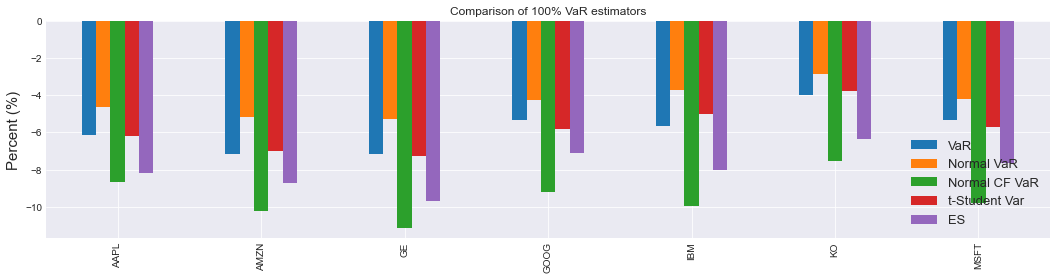

In [349]:
VaRs = pd.DataFrame({"VaR": ql.var(rets, CL=CL),
                     "Normal VaR": ql.var_normal(rets, CL=CL, cf=False),
                     "Normal CF VaR": ql.var_normal(rets, CL=CL, cf=True),
                     "t-Student Var": ql.var_tstudent(rets, CL=CL, left=True),
                     "ES": ql.es(rets, CL=CL, left=True)})

title = f"Comparison of {CL*100:.0f}% VaR estimators"
(VaRs * 100).plot.bar(figsize=(18,4), grid=True, title=title)
plt.ylabel("Percent (%)", fontsize=15)
plt.legend(fontsize=13)
plt.show()

### Rolling estimators

Simple computation of rolling historical VaRs and Expected Shortfall estimators for a given rolling window

In [72]:
df = rets["AAPL"]
window = 252

In [73]:
rvars_l = df.rolling(window=window).apply(ql.var, kwargs={"CL":CL, "left":True})
rvars_r = df.rolling(window=window).apply(ql.var, kwargs={"CL":CL, "left":False})

In [74]:
es_l = df.rolling(window=window).apply(ql.es, kwargs={"CL":CL, "left":True})
es_r = df.rolling(window=window).apply(ql.es, kwargs={"CL":CL, "left":False})

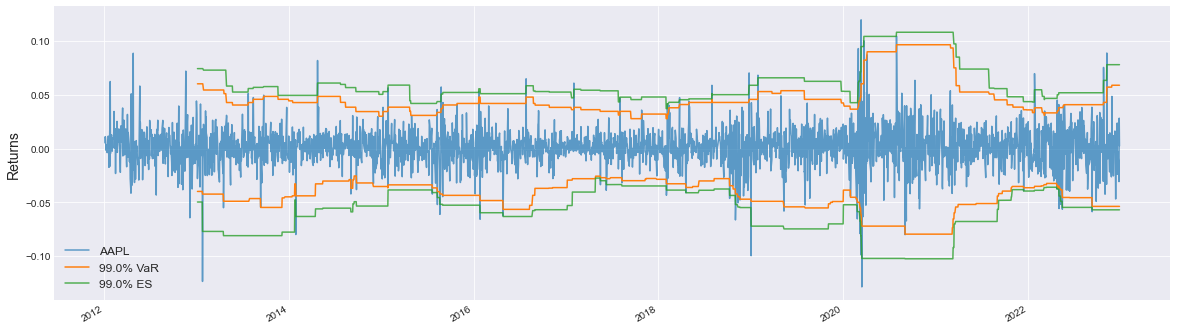

In [75]:
# Plot
fig, ax = plt.subplots(1,1,figsize=(20,6))
fig.suptitle("", fontsize=15)

df.plot(ax=ax, grid=True, alpha=0.7)
rvars_l.plot(ax=ax, grid=True, color="tab:orange", label=f"{CL*100:.1f}% VaR")
rvars_r.plot(ax=ax, grid=True, color="tab:orange", label="")
#
es_l.plot(ax=ax, grid=True, color="tab:green", alpha=0.8, label=f"{CL*100:.1f}% ES")
es_r.plot(ax=ax, grid=True, color="tab:green", alpha=0.8, label="")
#
ax.set_xlabel("",fontsize=14)
ax.set_ylabel("Returns",fontsize=14)
ax.legend(fontsize=12)
plt.show()

### Summary statistics

The following method returns a dataframe with summary statistics of an input pd.Series of pd.DataFrame of returns

In [345]:
ql.summary_stats(rets, CL=CL)

,AAPL,AMZN,GE,GOOG,IBM,KO,MSFT
(Ann.) Return,0.237492,0.226191,-0.024856,0.165097,0.015860,0.089164,0.245822
(Ann.) Std,0.291064,0.325284,0.324477,0.267496,0.229157,0.177299,0.265326
Skewness,-0.072332,0.412764,0.166840,0.423256,-0.539958,-0.664706,0.034961
Kurtosis,8.487693,10.548673,10.819133,11.823880,13.250592,12.816816,11.632551
VaR 0.99,-0.048387,-0.056431,-0.059087,-0.047631,-0.043399,-0.031608,-0.042652
Normal VaR 0.99,-0.041640,-0.046651,-0.047442,-0.038453,-0.033415,-0.025581,-0.037870
Normal CF VaR 0.99,-0.066104,-0.075270,-0.082082,-0.066826,-0.072159,-0.054817,-0.071164
Normal tStudent 0.99,-0.048813,-0.054478,-0.053559,-0.045070,-0.038580,-0.029591,-0.044309
ES 0.99,-0.068166,-0.074504,-0.081151,-0.060446,-0.065567,-0.049247,-0.061645
Max Drawdown,-0.437971,-0.561453,-0.811914,-0.446018,-0.437200,-0.369875,-0.371485


## Covariance Matrix estimations

---

TODO

In [ ]:
ql.covmat(rets)

In [ ]:
ql.covmat_cc(rets)

In [ ]:
ql.covmat_shrinkage(rets)

In [ ]:
ql.covmat_cc(rets["AAPL"])